In [10]:
library(ggplot2)
library(data.table)
library(dplyr)
library(tidyr)
library(purrr) 
library(scales)
if (!require(extrafont)) install.packages("extrafont")
library(extrafont)
library(boot)
# 3. 폰트 로드
loadfonts()


cmex10 already registered with pdfFont().

cmmi10 already registered with pdfFont().

cmr10 already registered with pdfFont().



cmsy10 already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Condensed already registered with pdfFont().

DejaVu Sans Light already registered with pdfFont().

esint10 already registered with pdfFont().

eufm10 already registered with pdfFont().

Liberation Mono already registered with pdfFont().

msam10 already registered with pdfFont().

msbm10 already registered with pdfFont().

rsfs10 already registered with pdfFont().

stmary10 already registered with pdfFont().

wasy10 already registered with pdfFont().

cmex10 already registered with postscriptFont().

cmmi10 already registered with postscriptFont().

cmr10 already registered with postscriptFont().

cmsy10 already registered with postscriptFont().

DejaVu Sans already registered with postscriptFont().

DejaVu Sans Condensed already registered with postscriptFont().

DejaVu Sans Light already registered with postscriptFont().

esint10 already registered with postscriptFont().

eufm10 alr

# Load data

In [2]:
df_x <- fread(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/data/supple/UKB.X.bigfam-gcta.weight2.tsv",
    sep = '\t'
)
df_x %>% head()

pheno,GCTA,lower_GCTA,upper_GCTA,weight,BIGFAM,lower_BIGFAM,upper_BIGFAM
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Monocyte_count,0.002644991,0.0004942725,0.004795709,2,0.007828119,0.0005624486,0.013686747
Platelet_count,0.002987333,0.0008503817,0.005124285,2,0.017821407,0.0072039409,0.029761266
Leg_predicted_mass__left_,0.007544839,0.0052868723,0.009802806,2,0.014919787,0.0057872195,0.026126168
Apolipoprotein_B,0.002708419,0.0005248126,0.004892026,2,0.005570786,0.0008195594,0.009163891
Leg_fat_mass__left_,0.004554547,0.0023620747,0.006747020,2,0.012116872,0.0025482719,0.022513876
Leg_fat-free_mass__left_,0.007570696,0.0053123523,0.009829040,2,0.015820051,0.0049782434,0.029883753


In [3]:
df_xmxf <- fread(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/data/supple/UKB.XmXf.bigfam-gcta.weight2.tsv",
    sep = '\t'
)
df_xmxf %>% head()

pheno,lambda,weight,Vx_male_bigfam,lower_male_Vx,upper_male_Vx,Vx_female_bigfam,lower_female_Vx,upper_female_Vx,r,lower_r,upper_r,DCR_bigfam,Vx_male_gcta,lower_Vx_male,upper_Vx_male,Vx_female_gcta,lower_Vx_female,upper_Vx_female,DCR_gcta
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hand_grip_strength__left_,0.3082598,2,0.001705526,1.253098e-05,0.004957134,0.002044821,8.516356e-04,0.003483356,1,-1.00,1,0.8340713,0.006058590,0.001532726,0.01058446,0.006664700,2.830292e-03,0.010499108,0.9090567
Arm_fat-free_mass__right_,0.6025213,2,0.008300719,7.741944e-05,0.020524186,0.005627753,1.429506e-03,0.010360874,-1,-1.00,1,1.4749616,0.014669504,0.009790133,0.01954888,0.007923873,3.957212e-03,0.011890534,1.8513048
Forced_vital_capacity__FVC__Z-score,0.4284536,2,0.005628110,1.312787e-05,0.012106735,0.003852182,1.413091e-03,0.006939029,1,-1.00,1,1.4610185,0.008389818,0.002654886,0.01412475,0.004671435,3.618831e-05,0.009306682,1.7959829
Leg_predicted_mass__right_,0.6312283,2,0.013897005,4.046964e-03,0.023310160,0.006159614,2.116594e-03,0.011632430,1,-1.00,1,2.2561486,0.013460740,0.008661084,0.01826040,0.007134650,3.137070e-03,0.011132231,1.8866713
Waist_circumference,0.4744789,2,0.009061604,2.601486e-03,0.016143535,0.003524400,7.944360e-05,0.007411789,1,-0.43,1,2.5711058,0.008716362,0.004174472,0.01325825,0.004555393,7.664621e-04,0.008344323,1.9134162
Body_fat_percentage,0.5445789,2,0.006192087,1.129550e-06,0.014008902,0.003044163,3.315464e-05,0.007598489,1,-1.00,1,2.0340851,0.010194102,0.005504727,0.01488348,0.005441628,1.510869e-03,0.009372388,1.8733550


In [11]:
# 리샘플링을 위한 함수 정의
calc_correlation <- function(data, indices) {
    d <- data[indices,]
    return(cor(d$GCTA, d$BIGFAM))
}

# 부트스트랩 실행 (1000회 반복)
set.seed(123)  # 재현성을 위한 시드 설정
boot_results <- boot(
    data = df_x,
    statistic = calc_correlation,
    R = 1000
)

# 결과 확인
boot_ci <- boot.ci(boot_results, type = "basic")

# 결과 출력
cat("상관계수:", cor(df_x$GCTA, df_x$BIGFAM), "\n")
cat("95% 신뢰구간:", boot_ci$basic[4], "~", boot_ci$basic[5], "\n")

상관계수: 0.658252 
95% 신뢰구간: 0.396789 ~ 0.9865922 


In [14]:
# 리샘플링을 위한 함수 정의
calc_correlation <- function(data, indices) {
    d <- data[indices,]
    return(cor(d$DCR_gcta, d$DCR_bigfam))
}

# 부트스트랩 실행 (1000회 반복)
set.seed(123)  # 재현성을 위한 시드 설정
boot_results <- boot(
    data = df_xmxf,
    statistic = calc_correlation,
    R = 1000
)

# 결과 확인
boot_ci <- boot.ci(boot_results, type = "basic")

# 결과 출력
cat("상관계수:", cor(df_xmxf$DCR_gcta, df_xmxf$DCR_bigfam), "\n")
cat("95% 신뢰구간:", boot_ci$basic[4], "~", boot_ci$basic[5], "\n")

상관계수: 0.6368928 
95% 신뢰구간: 0.4216384 ~ 0.8845742 


# plot theme

In [4]:
# 공통 테마 함수 정의
get_nature_theme <- function() {
    theme_bw() +
    theme(
        # 전체적인 배경
        panel.background = element_rect(fill = NA, color = NA),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_rect(color = "black", fill = NA, size = 0.6),  # size로 선 굵기 조절
        
        # panel.border = element_blank(),  
        
        # 축 설정
        # axis.line.x.top = element_line(color = "black", size = 0.3),  
        # axis.line.y.right = element_line(color = "black", size = 0.3),  
        # axis.line.x.bottom = element_line(color = "black", size = 0.3),  
        # axis.line.y.left = element_line(color = "black", size = 0.3),    
        axis.text = element_text(size = 6.5, color = "black"),
        axis.title = element_text(size = 7.5, color = "black"),
        axis.ticks = element_line(size = 0.3),
        axis.ticks.length = unit(0.8, "mm"),
        
        # 메인 figure에 박스 추가
        # plot.background = element_rect(color = "black", fill = NA),
        
        # legend 박스 제거
        legend.box.background = element_blank(),  # 이전: element_rect(color = "black")
        
        # 범례 설정
        legend.margin = margin(1, 1, 1, 1, unit = "mm"),
        # legend.spacing.y = unit(0.1, "cm"),
        
        # 여백 설정
        # plot.margin = unit(c(0.1, 0.2, 0.1, 0.1), "cm")
        plot.margin = margin(2, 4, 0, 1, unit = "mm")
    ) + 
    theme(
        # 기본 텍스트 설정
        text = element_text(),
        
        # 축 제목
        axis.title = element_text(size = 12),
        
        # 축 텍스트
        axis.text = element_text(size = 10),
        
        # 범례
        legend.text = element_text(size = 10),
        legend.title = element_text(size = 10),
        
        # 플롯 제목
        plot.title = element_text(size = 10, face = "bold"),
        
        # 축 설정
        axis.line = element_line(colour = "black", size = 0.5),
        axis.ticks = element_line(colour = "black", size = 0.5),
        
        # 패널 설정
        panel.grid = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
    )
}

# Step 1. X

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


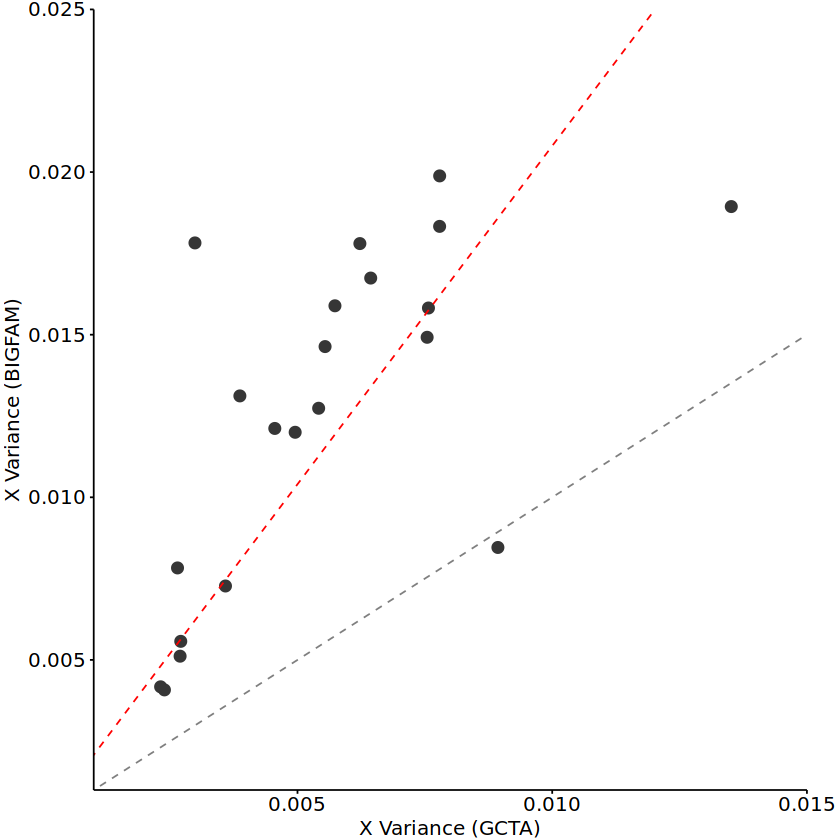

In [5]:
fit <- lm(BIGFAM ~ 0 + GCTA, data = df_x)  # 0을 추가하여 절편을 0으로 강제
  
p <- ggplot(
    df_x, aes(x = GCTA, y = BIGFAM)
) +
    geom_point(size = 3, color = "#363636") +
    geom_abline(intercept = 0, slope = 1, color = "grey50", linetype = "dashed") +  # reference line (y=x)
    geom_abline(slope = coef(fit)[1], intercept = 0, color = "red", linetype = "dashed") +  # intercept를 0으로 설정
    get_nature_theme() + 
    scale_x_continuous(
        breaks = c(0.005, 0.010, 0.015),
        limits = c(0.001, 0.015),
        expand = c(0, 0)  # x축의 여백을 0으로 설정
    ) +
    scale_y_continuous(
        breaks = scales::pretty_breaks(),
        limits = c(0.001, 0.025),
        expand = c(0, 0)  # y축의 여백을 0으로 설정
    ) + 
    labs(
        x = "X Variance (GCTA)",
        y = "X Variance (BIGFAM)"
    ) +
    theme(
        plot.margin = margin(t = 2, r = 7, b = 0, l = 1, unit = "mm"),
        axis.text = element_text(size = 12)
    )

p

In [7]:
df_x %>% summarise(
    mean_GCTA = mean(GCTA),
    sd_GCTA = sd(GCTA),
    mean_BIGFAM = mean(BIGFAM),
    sd_BIGFAM = sd(BIGFAM)
)

mean_GCTA,sd_GCTA,mean_BIGFAM,sd_BIGFAM
<dbl>,<dbl>,<dbl>,<dbl>
0.005485746,0.002774277,0.01253529,0.005226838


In [134]:
ggsave(
    filename = "/data/jerrylee/pjt/BIGFAM.v.2.0/figures/X.vs-UKB.pdf",
    plot = p,
    width = 77,
    height = 64,
    units = "mm",
    dpi = 300
)

# Step 2. XmXf (DCR)

In [46]:
df_xmxf %>% head()

pheno,lambda,weight,Vx_male_bigfam,lower_male_Vx,upper_male_Vx,Vx_female_bigfam,lower_female_Vx,upper_female_Vx,r,lower_r,upper_r,DCR_bigfam,Vx_male_gcta,lower_Vx_male,upper_Vx_male,Vx_female_gcta,lower_Vx_female,upper_Vx_female,DCR_gcta
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hand_grip_strength__left_,0.3082598,2,0.001705526,1.253098e-05,0.004957134,0.002044821,8.516356e-04,0.003483356,1,-1.00,1,0.8340713,0.006058590,0.001532726,0.01058446,0.006664700,2.830292e-03,0.010499108,0.9090567
Arm_fat-free_mass__right_,0.6025213,2,0.008300719,7.741944e-05,0.020524186,0.005627753,1.429506e-03,0.010360874,-1,-1.00,1,1.4749616,0.014669504,0.009790133,0.01954888,0.007923873,3.957212e-03,0.011890534,1.8513048
Forced_vital_capacity__FVC__Z-score,0.4284536,2,0.005628110,1.312787e-05,0.012106735,0.003852182,1.413091e-03,0.006939029,1,-1.00,1,1.4610185,0.008389818,0.002654886,0.01412475,0.004671435,3.618831e-05,0.009306682,1.7959829
Leg_predicted_mass__right_,0.6312283,2,0.013897005,4.046964e-03,0.023310160,0.006159614,2.116594e-03,0.011632430,1,-1.00,1,2.2561486,0.013460740,0.008661084,0.01826040,0.007134650,3.137070e-03,0.011132231,1.8866713
Waist_circumference,0.4744789,2,0.009061604,2.601486e-03,0.016143535,0.003524400,7.944360e-05,0.007411789,1,-0.43,1,2.5711058,0.008716362,0.004174472,0.01325825,0.004555393,7.664621e-04,0.008344323,1.9134162
Body_fat_percentage,0.5445789,2,0.006192087,1.129550e-06,0.014008902,0.003044163,3.315464e-05,0.007598489,1,-1.00,1,2.0340851,0.010194102,0.005504727,0.01488348,0.005441628,1.510869e-03,0.009372388,1.8733550


In [47]:
df_xmxf %>% 
    summarise(
        mean_DCR_GCTA = mean(DCR_gcta),
        sd_DCR_GCTA = sd(DCR_gcta),
        mean_DCR_BIGFAM = mean(DCR_bigfam),
        sd_DCR_BIGFAM = sd(DCR_bigfam),
        size = nrow(df_xmxf)
    )

mean_DCR_GCTA,sd_DCR_GCTA,mean_DCR_BIGFAM,sd_DCR_BIGFAM,size
<dbl>,<dbl>,<dbl>,<dbl>,<int>
1.781633,0.4064778,1.882524,0.5040314,24


Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


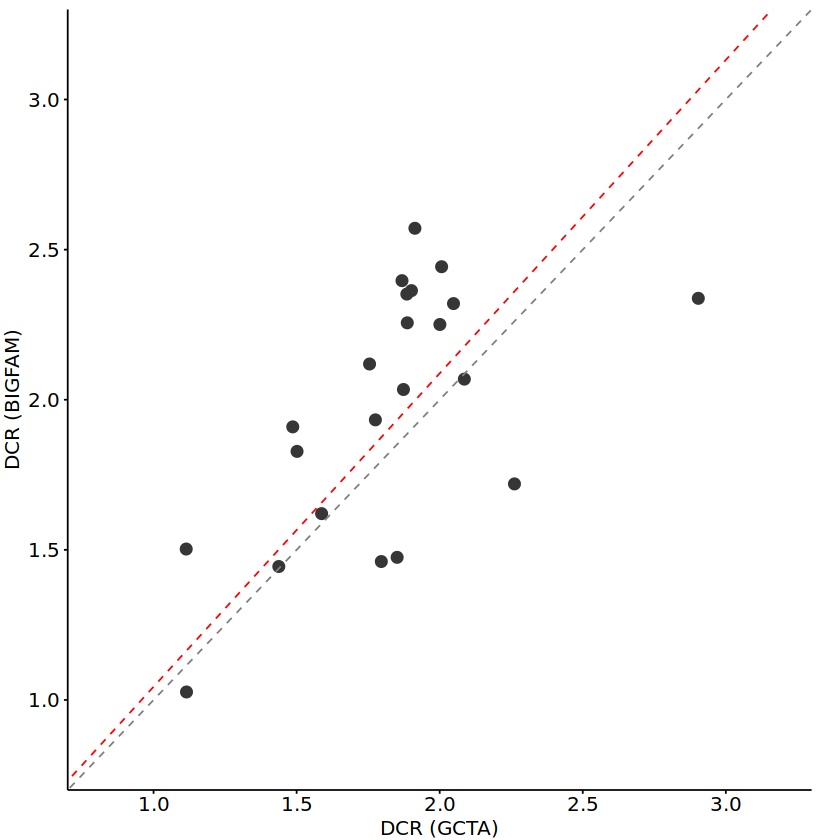

In [48]:
fit <- lm(DCR_bigfam ~ 0 + DCR_gcta, data = df_xmxf)  # 0을 추가하여 절편을 0으로 강제
  
p <- ggplot(
    df_xmxf, aes(x = DCR_gcta, y = DCR_bigfam)
) +
    geom_point(size = 3, color = "#363636") +
    geom_abline(intercept = 0, slope = 1, color = "grey50", linetype = "dashed") +  # reference line (y=x)
    geom_abline(slope = coef(fit)[1], intercept = 0, color = "red", linetype = "dashed") +  # intercept를 0으로 설정
    get_nature_theme() + 
    scale_x_continuous(
        breaks = scales::pretty_breaks(),
        limits = c(1, 3),
        expand = c(0.1, 0.1)
    ) +
    scale_y_continuous(
        breaks = scales::pretty_breaks(),
        limits = c(1, 3),
        expand = c(0.1, 0.1)  # y축의 여백을 0으로 설정
    ) +
    labs(
        x = "DCR (GCTA)",
        y = "DCR (BIGFAM)"
    ) +
    theme(
        plot.margin = margin(t = 2, r = 6, b = 0, l = 1, unit = "mm"),
        axis.text = element_text(size = 12)
    )


p

In [43]:
summary(fit)


Call:
lm(formula = DCR_bigfam ~ 0 + DCR_gcta, data = df_xmxf)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9601 -0.1206  0.1208  0.3417  0.5736 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
DCR_gcta  1.04395    0.04503   23.18   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4027 on 23 degrees of freedom
Multiple R-squared:  0.959,	Adjusted R-squared:  0.9572 
F-statistic: 537.4 on 1 and 23 DF,  p-value: < 2.2e-16


In [44]:
ggsave(
    filename = "/data/jerrylee/pjt/BIGFAM.v.2.0/figures/X.DCR-vs-UKB.pdf",
    plot = p,
    width = 77,
    height = 64,
    units = "mm",
    dpi = 300
)

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
